In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 9.1

Была проверена работа примеров в блокноте chap09.ipynb

В разделе «Нарастающая сумма» было отмечено, что некоторые примеры не работают с апериодическими сигналами.

Для демонстрации этого периодический пилообразный сигнал был заменён на непериодические данные Facebook.


In [ ]:
if not os.path.exists('FB_2.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/FB_2.csv

In [ ]:
import pandas as pd
df = pd.read_csv('FB_2.csv', header=0, parse_dates=[0])

In [ ]:
from thinkdsp import Wave

ys = df['Close']

if len(ys) % 2:
    ys = ys[:-1]

in_wave = Wave(ys, framerate=1)
in_wave.normalize()
in_wave.unbias()

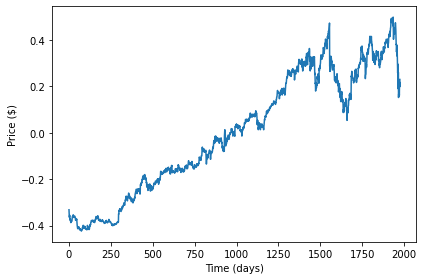

In [ ]:
from thinkdsp import decorate
in_wave.plot()
decorate(xlabel='Time (days)', ylabel='Price ($)')

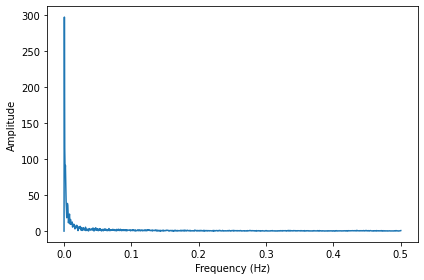

In [ ]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

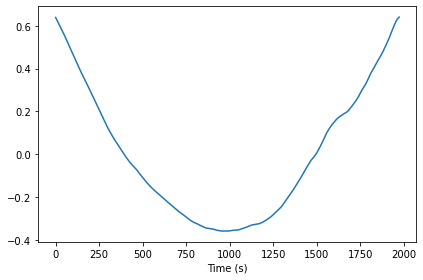

In [ ]:
out_wave = in_wave.cumsum()
out_wave.normalize()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

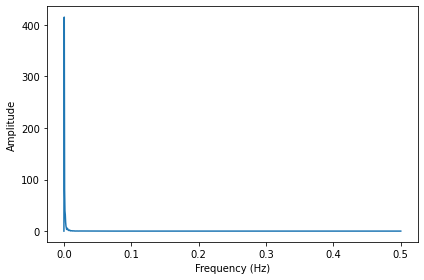

In [ ]:
out_spectrum = out_wave.make_spectrum()
out_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

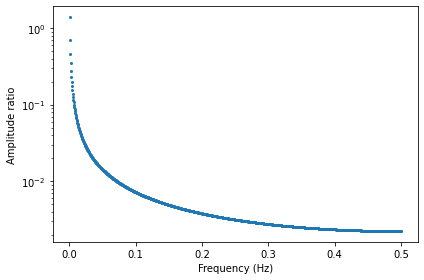

In [ ]:
ratio_spectrum = out_spectrum.ratio(in_spectrum, thresh=0.1)
ratio_spectrum.plot(marker='.', ms=4, ls='')

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

In [ ]:
import numpy as np
from thinkdsp import zero_pad
diff_window = np.array([1.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

In [ ]:
cumsum_filter = diff_filter.copy()
cumsum_filter.hs[1:] = 1 / cumsum_filter.hs[1:]
cumsum_filter.hs[0] = np.inf

In [ ]:
PI2 = np.pi * 2
integ_filter = cumsum_filter.copy()
integ_filter.hs[1:] = integ_filter.framerate / (PI2 * 1j * integ_filter.fs[1:])
integ_filter.hs[0] = np.inf

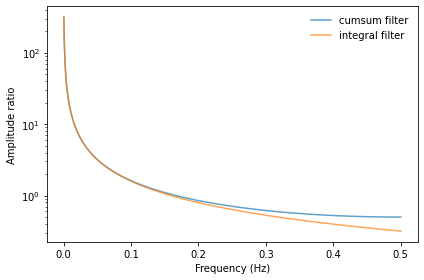

In [ ]:
cumsum_filter.plot(label='cumsum filter', alpha=0.7)
integ_filter.plot(label='integral filter', alpha=0.7)

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

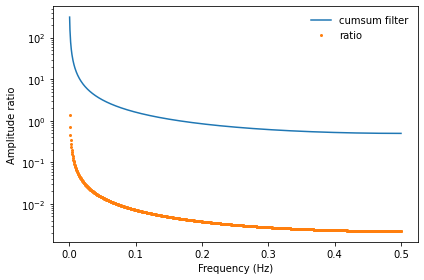

In [ ]:
cumsum_filter.plot(label='cumsum filter')
ratio_spectrum.plot(label='ratio', marker='.', ms=4, ls='')
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

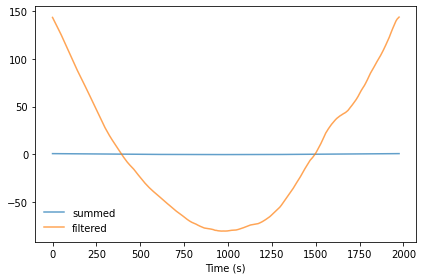

In [ ]:
out_wave.plot(label='summed', alpha=0.7)

cumsum_filter.hs[0] = 0
out_wave2 = (in_spectrum * cumsum_filter).make_wave()
out_wave2.plot(label='filtered', alpha=0.7)

decorate(xlabel='Time (s)')

In [ ]:
out_wave.max_diff(out_wave2)

143.41984235990788

# Упражнение 9.2

В этом упражнении изучается влияние diff и differentiate на треугольный сигнал.


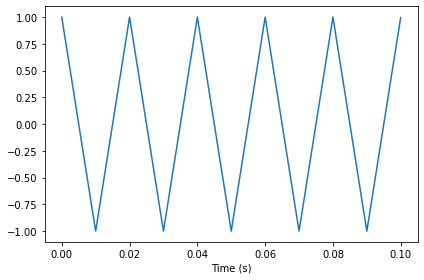

In [ ]:
from thinkdsp import TriangleSignal
in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

К треугольному сигналу был применён diff.

В результате был получен прямоугольный сигнал, что логично, так как прямоугольный сигнал спадает пропорционально $1/f$, в то время как треугольный спадает пропорционально $1/f^2$.

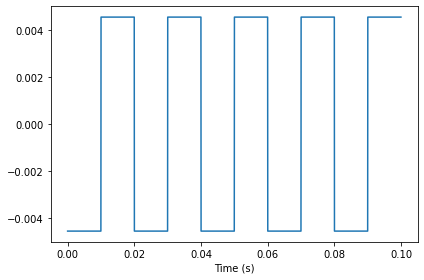

In [ ]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

Был вычислен спектр треугольного сигнала, затем к нему был применён differentiate, после чего он был обратно преобразован в сигнал.

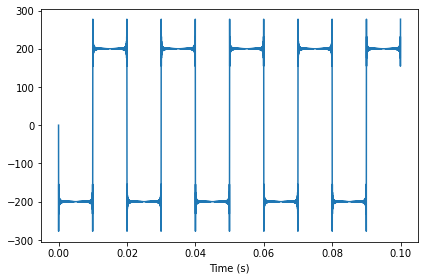

In [ ]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

На графике видны изломы (так называемый “звон”) на месте перегиба треугольного сигнала. Это связанно с тем, что производная треугольного сигнала не определена в точках его излома.

# Упражнение 9.3

В этом упражнении изучается влияние cumsum и integrate на прямоугольный сигнал.

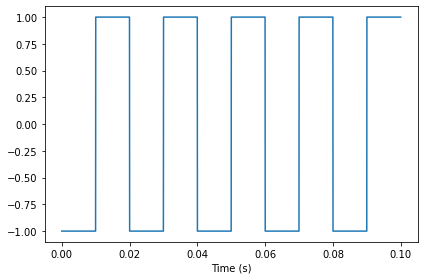

In [ ]:
from thinkdsp import SquareSignal
in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Был применён cumsum.

Ожидаемо был получен треугольный сигнал.

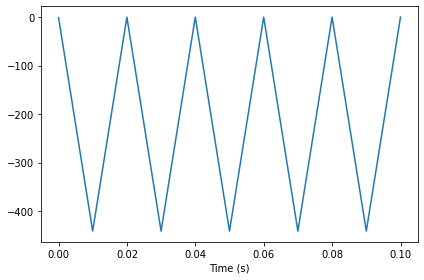

In [ ]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Был вычислен спектр прямоугольного сигнала, затем к нему был применён integrate, после чего он был обратно преобразован в сигнал.

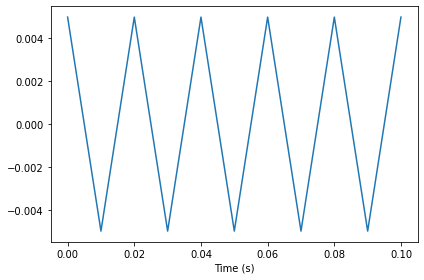

In [ ]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Внешне сигналы совпадают. Для полного совпадения необходимо применить к сигналу функции unbias and normalize.

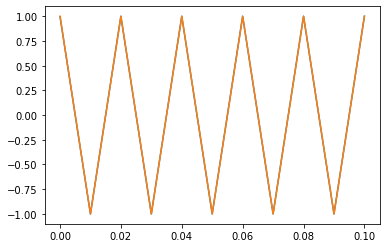

In [ ]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

In [ ]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

# Упражнение 9.4

В данном упражнении изучается влияние двойного интегрирования.

Был создан пилообразный сигнал, вычислен его спектр, а затем дважды был применён integrate. 


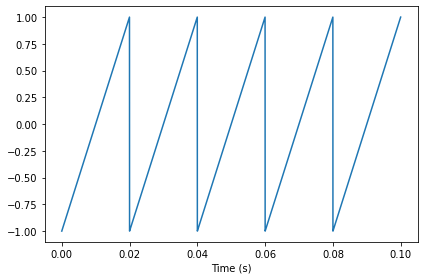

In [ ]:
from thinkdsp import SawtoothSignal
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

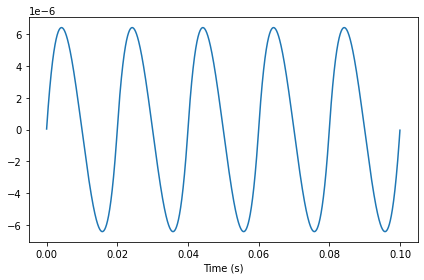

In [ ]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave = spectrum.make_wave()
out_wave.plot()
decorate(xlabel='Time (s)')

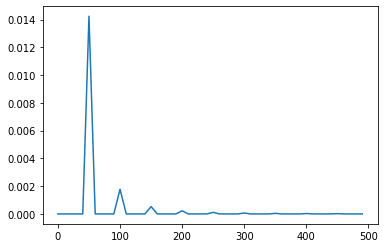

In [ ]:
out_wave.make_spectrum().plot(high=500)

Результат внешне напоминает синусоиду. Причина в том, что интегрирование (integrate) действует как фильтр нижних частот. После двух интегрирований по сути были отфильтрованы почти все частоты, кроме основной.

# Упражнение 9.5

В этом упражнении изучается влияние второй разности и второй производной.

Был создан CubicSignal.

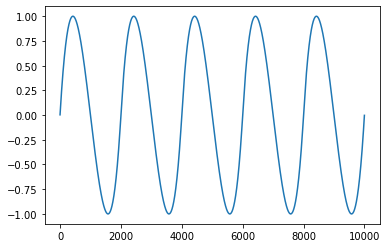

In [ ]:
from thinkdsp import CubicSignal
in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Для CubicSignal была вычислена вторая разность, для этого дважды применена diff.

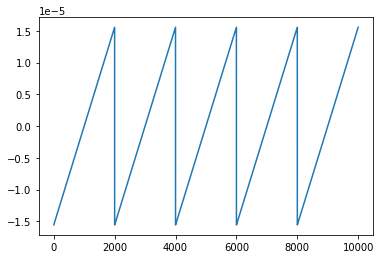

In [ ]:
out_wave = in_wave.diff().diff()
out_wave.plot()

Ожидаемо был получен пилообразный сигнал.

Для CubicSignal также была вычислена вторая производная, для этого к спектру дважды была применена differentiate.

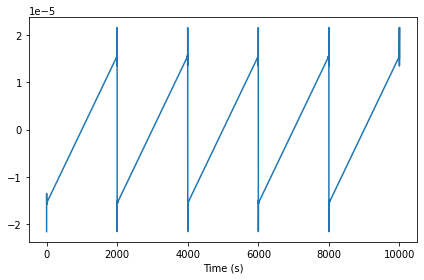

In [ ]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

При двойном дифференцировании (differentiate) получается пилообразный сигнал со "звоном".

Вновь, это связанно с тем, что производная сигнала не определена в некоторых точках.

Окно для второй разности это -1, 2, -1. Вычисление ДПФ позволяет получить соответствующий фильтр.

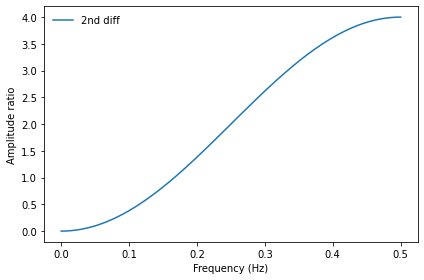

In [ ]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

Для второй производной можно получить соответствующий фильтр, если рассчитать фильтр первой прозводной и возвести его в квадрат.

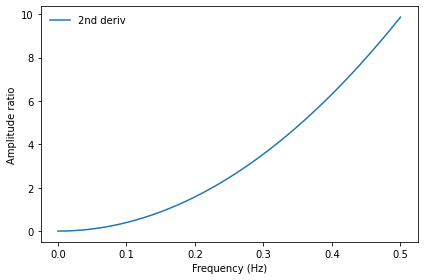

In [ ]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

Полученные фильтры представленные на графике в одном масштабе:

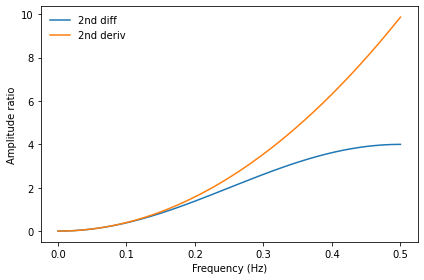

In [ ]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

Оба фильтра - это фильтры верхних частот, которые усиливают высокочастотные компоненты.

Вторая разность (синяя) является хорошо аппроксимирует вторую производной только на самых низких частотах, затем она существенно отклоняется.

В отличии от неё, вторая производная (оранжевая) заметно усиливает самые высокие частоты.